In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from astropy.constants import h, hbar, c, eps0, a0, k_B

from lightmatter import GaussianBeam, Lattice1d, BowtieLattice2d, LaserSetup
from plotting import interactive_plot

In [2]:
def alpha_s12_hfs(lambda_, f, mf, epsilon=1): # epsilon=1 for linear polarization
    omega = (2*np.pi*c / lambda_).to(u.THz)
    # D values for K40
    gamma = 2*np.pi * 5.956 * u.MHz
    omegaD1 = 2*np.pi * 389.28618435 * u.THz
    omegaD2 = 2*np.pi * 391.01629605 * u.THz
    ispin = 4
    gf = (f * (f + 1) + 1 / 2 * (1 / 2 + 1) - ispin * (ispin + 1)) / (f * (f + 1))
    alpha = -(1/h * np.pi * c**2 * gamma * (1 / (2 * ((omegaD1 + omegaD2) / 2)**3))) * ((1 / (omega - omegaD1)) - (1/(omega + omegaD1)) \
            + (2 / (omega - omegaD2)) - (2 /(omega + omegaD1)) - gf * mf * np.sqrt(1 - epsilon**2) * ((1 / (omega - omegaD1)) - (1 / (omega + omegaD1)) \
            - 2 / (omega - omegaD2) + 2 / (omega + omegaD2)))
    return alpha.to(u.Hz/(u.mW/u.cm**2))

In [3]:
m_K40 = 39.96399848 * u.u # see Tiecke
alpha_S12_1064 = ((599.17 * 4*np.pi*eps0*a0**3 / h) / (2*eps0*c)).to(u.Hz/(u.mW/u.cm**2)) # see Savronova
alpha_S12_866 = ((1335.32 * 4*np.pi*eps0*a0**3 / h) / (2*eps0*c)).to(u.Hz/(u.mW/u.cm**2)) # see Savronova

lambda_rm = (c / ((c/(770.108385049*u.nm)).to(u.GHz)  - 50*u.GHz)).to(u.nm) # see Tiecke
alpha_rm1 = alpha_s12_hfs(lambda_rm, 9/2, -9/2) # see Tiecke
alpha_rm2 = alpha_s12_hfs(lambda_rm, 7/2, -7/2) # see Tiecke

k_1064 = 2*np.pi/(1064*u.nm) 
Er_1064 = (hbar**2 * k_1064**2 / (2*m_K40) / h).to(u.kHz)

k_866 = 2*np.pi/(866*u.nm)
Er_866 = (hbar**2 * k_866**2 / (2*m_K40) / h).to(u.kHz)

k_rm = 2*np.pi/lambda_rm
Er_rm = (hbar**2 * k_rm**2 / (2*m_K40) / h).to(u.kHz)

In [4]:
alpha_rm1

<Quantity 18.15656519 cm2 Hz / mW>

In [5]:
alpha_rm2

<Quantity 18.15656519 cm2 Hz / mW>

<h3>Horizontal lattice</h3>

In [6]:
w0 = 175 * u.um
lambda_ = 1064 * u.nm
P = 11 * u.W

bowtie = BowtieLattice2d(
    lattice_direction_vec1=(1,1,0),
    lattice_direction_vec2=(1,-1,0),
    pol_Jones_vec=(0,1), # linear vertical
    lambda_=lambda_,
    w0=w0,
    P=2*P,
    z0=0,
    name='2d Bowtie x-y',
    color='blue',
)

lat1d_x = Lattice1d(
    lattice_direction_vec=(1,0,0),
    intersect_angle=0,
    pol_Jones_vec=(0,1), # linear horizontal
    lambda_=lambda_,
    w0=w0,
    P=P,
    z0=0,
    name='1D Lattice x',
    color='red',
)
lat1d_y = Lattice1d(
    lattice_direction_vec=(0,1,0),
    intersect_angle=0,
    pol_Jones_vec=(0,1), # linear horizontal
    lambda_=lambda_,
    w0=w0,
    P=P,
    z0=0,
    name='1D Lattice y',
    color='magenta',
)

<h3>Vertical shallow-angle lattice</h3>

In [7]:
w0_z = 50 * u.um
lambda_z = 866 * u.nm
P_z = 0.5 * u.W
angle = 165

lat1d_z = Lattice1d(   
    lattice_direction_vec=(0,0,1),
    intersect_angle=angle,
    pol_Jones_vec=(0,1), # linear horizontal
    lambda_=lambda_z,
    w0=w0_z,
    P=P_z,
    z0=0,
    name='1D Shallow-angle Lattice z',
    color='cyan',
)

<h3>Light sheet</h3>

In [8]:
w0_ls = [300, 10] * u.um
lambda_ls = 1064 * u.nm
P_ls = 3 * u.W

lightsheet = GaussianBeam(
    beam_direction_vec=(1,0,0),
    pol_Jones_vec=(1,0), # linear horizontal
    lambda_=lambda_ls,
    w0=w0_ls,
    P=P_ls,
    z0=0,
    name='Light Sheet',
    color='purple',
)

<h3>Raman beams</h3>

In [44]:
w0_rm = 700 * u.um
lambda_rm = (c / ((c/(770.108385049*u.nm)).to(u.GHz)  - 50*u.GHz)).to(u.nm) # see Tiecke
P_rm1 = 100 * u.mW
P_rm2 = 50 * u.mW


raman1 = GaussianBeam(
    beam_direction_vec=(1,1,0.2),
    pol_Jones_vec=(1,0), # linear horizontal
    lambda_=lambda_rm,
    w0=w0_rm,
    P=P_rm1,
    z0=0,
    name='Raman 1',
    color='red',
)

raman2 = GaussianBeam(
    beam_direction_vec=(1,-1,0.2),
    pol_Jones_vec=(1,0), # linear horizontal
    lambda_=lambda_rm,
    w0=w0_rm,
    P=P_rm2,
    z0=0,
    name='Raman 2',
    color='red',
)

<h3>Laser Setup</h3>

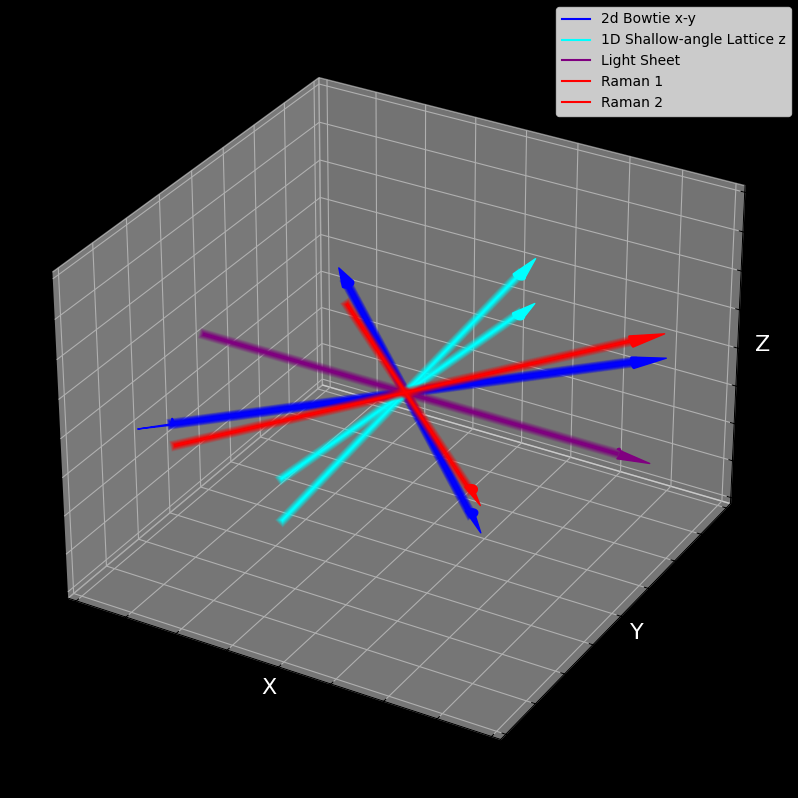

In [45]:
lasers = [bowtie, lat1d_z, lightsheet, raman1, raman2]
lat3d = LaserSetup(lasers)

lat3d.plot_beams()

<h3>Lattice analysis</h3>

In [14]:
n = 151

x = np.linspace(-1, 1, n) * u.um
y = np.linspace(-1, 1, n) * u.um
z = np.linspace(-5, 5, n) * u.um

X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

In [15]:
lat2d_regular = LaserSetup([lat1d_x, lat1d_y])

V_bowtie_2d = - (alpha_S12_1064 * bowtie.I(X, Y, Z)).to(u.kHz) 
V_regular_2d = - (alpha_S12_1064 * lat2d_regular.I(X, Y, Z)).to(u.kHz)

V_light_sheet = - (alpha_S12_1064 * lightsheet.I(X, Y, Z)).to(u.kHz)
V_shallow_angle = - (alpha_S12_866 * lat1d_z.I(X, Y, Z)).to(u.kHz)

V_raman1 = - (alpha_rm1 * (raman1.I(X, Y, Z))).to(u.kHz)
V_raman2 = - (alpha_rm2 * (raman2.I(X, Y, Z))).to(u.kHz)

/home/lelo/anaconda3/envs/lightmatter/lib/python3.10/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [59]:
interactive_plot(
    [V_bowtie_2d+V_shallow_angle+V_light_sheet+V_raman1+V_raman2, V_regular_2d+V_shallow_angle+V_light_sheet+V_raman1+V_raman2],
    x, y, z,
    ['Total potential (bowtie)', 'Total potential (regular)'],
    'V [h x kHz]',
)

Output()

In [ ]:
interactive_plot(
    [V_raman1, V_raman2],
    x, y, z,
    ['Raman 1', 'Raman 2'],
    'V [h x kHz]',
)

In [29]:
d2V_bowtie_d2x = np.gradient(np.gradient(V_bowtie_2d+V_raman1+V_raman2, x, axis=0), x, axis=0)
d2V_bowtie_d2y = np.gradient(np.gradient(V_bowtie_2d+V_raman1+V_raman2, y, axis=1), y, axis=1)

d2V_regular_d2x = np.gradient(np.gradient(V_regular_2d+V_raman1+V_raman2, x, axis=0), x, axis=0)
d2V_regular_d2y = np.gradient(np.gradient(V_regular_2d+V_raman1+V_raman2, y, axis=1), y, axis=1)

d2V_shallow_angle_d2z = np.gradient(np.gradient(V_shallow_angle+V_raman1+V_raman2, z, axis=2), z, axis=2)
d2V_light_sheet_d2z = np.gradient(np.gradient(V_light_sheet+V_raman1+V_raman2, z, axis=2), z, axis=2)
d2V_both_d2z = np.gradient(np.gradient(V_shallow_angle+V_light_sheet+V_raman1+V_raman2, z, axis=2), z, axis=2)

d2V_raman_d2x = np.gradient(np.gradient(V_raman1 + V_raman2, x, axis=0), x, axis=0)
d2V_raman_d2y = np.gradient(np.gradient(V_raman1 + V_raman2, y, axis=1), y, axis=1)
d2V_raman_d2z = np.gradient(np.gradient(V_raman1 + V_raman2, z, axis=2), z, axis=2)

In [55]:
def get_lattice_depth(V, axis):
    return np.min(V.min(axis=axis))

def get_trap_frequency(d2V_d2xi):
    w_sq = ((h*d2V_d2xi).to(u.J/u.m**2) / m_K40).to(u.kHz**2)
    mask = w_sq.value > 0
    w = np.NaN * np.zeros_like(w_sq.value) * u.kHz 
    w[mask] = np.sqrt(w_sq[mask])
    return w

def get_lamb_dicke(w_trap, k_raman):
    a = np.sqrt(hbar/(2*m_K40*w_trap)).to(u.um)
    k_raman = k_raman.to(1/u.um)
    return k_raman*a

In [56]:
depth_xy_bowtie = get_lattice_depth(V_bowtie_2d, 0)
depth_xy_regular = get_lattice_depth(V_regular_2d, 0)
depth_x_raman = get_lattice_depth(V_raman1 + V_raman2, 0)
depth_y_raman = get_lattice_depth(V_raman1 + V_raman2, 1)

depth_z_shallow_angle = get_lattice_depth(V_shallow_angle, 2)
depth_z_light_sheet = get_lattice_depth(V_light_sheet, 2)
depth_z_both = get_lattice_depth(V_shallow_angle + V_light_sheet, 2)
depth_z_raman = get_lattice_depth(V_raman1 + V_raman2, 2)

w_xy_bowtie = get_trap_frequency(d2V_bowtie_d2x)
w_xy_regular = get_trap_frequency(d2V_regular_d2x)
w_x_raman = get_trap_frequency(d2V_raman_d2x)
w_y_raman = get_trap_frequency(d2V_raman_d2y)

w_z_shallow_angle = get_trap_frequency(d2V_shallow_angle_d2z)
w_z_light_sheet = get_trap_frequency(d2V_light_sheet_d2z)
w_z_both = get_trap_frequency(d2V_both_d2z)
w_z_raman = get_trap_frequency(d2V_raman_d2z)

k_raman_vec = np.sqrt(raman1.k_vec**2 + raman2.k_vec**2)

eta_xy_bowtie = get_lamb_dicke(np.nanmax(w_xy_bowtie), k_raman_vec[0])
eta_xy_regular = get_lamb_dicke(np.nanmax(w_xy_regular), k_raman_vec[0])
eta_x_raman = get_lamb_dicke(np.nanmax(w_x_raman), k_raman_vec[0])
eta_y_raman = get_lamb_dicke(np.nanmax(w_y_raman), k_raman_vec[1])

eta_z_shallow_angle = get_lamb_dicke(np.nanmax(w_z_shallow_angle), k_raman_vec[2])
eta_z_light_sheet = get_lamb_dicke(np.nanmax(w_z_light_sheet), k_raman_vec[2])
eta_z_both = get_lamb_dicke(np.nanmax(w_z_both), k_raman_vec[2])
eta_z_raman = get_lamb_dicke(np.nanmax(w_z_raman), k_raman_vec[2])

In [50]:
raman1.k_vec

<Quantity [5.71159162, 5.71159162, 1.14231832] 1 / um>

In [51]:
raman2.k_vec

<Quantity [ 5.71159162, -5.71159162,  1.14231832] 1 / um>

In [57]:
data = {
    "Configuration": [
        "Bowtie", 
        "Regular", 
        "Shallow angle", 
        "Light sheet", 
        "Shallow angle + Light sheet",
        "Raman along x",
        "Raman along y",
        "Raman along z",
    ],
    "Depth [h x kHz]": [
        depth_xy_bowtie.to(u.kHz).value,
        depth_xy_regular.to(u.kHz).value,
        depth_z_shallow_angle.to(u.kHz).value,
        depth_z_light_sheet.to(u.kHz).value,
        depth_z_both.to(u.kHz).value,
        depth_x_raman.to(u.kHz).value,
        depth_y_raman.to(u.kHz).value,
        depth_z_raman.to(u.kHz).value,
    ],
    "Depth [Er]": [
        depth_xy_bowtie/Er_1064,
        depth_xy_regular/Er_1064,
        depth_z_shallow_angle/Er_866,
        depth_z_light_sheet/Er_1064,
        depth_z_shallow_angle/Er_866 + depth_z_light_sheet/Er_1064,
        depth_x_raman/Er_rm,
        depth_y_raman/Er_rm,
        depth_z_raman/Er_rm,
    ],
    "Depth [µK]": [
        (h*depth_xy_bowtie/k_B).to(u.uK).value,
        (h*depth_xy_regular/k_B).to(u.uK).value,
        (h*depth_z_shallow_angle/k_B).to(u.uK).value,
        (h*depth_z_light_sheet/k_B).to(u.uK).value,
        (h*depth_z_both/k_B).to(u.uK).value,
        (h*depth_x_raman/k_B).to(u.uK).value,
        (h*depth_y_raman/k_B).to(u.uK).value,
        (h*depth_z_raman/k_B).to(u.uK).value,
    ],
    "Trap frequency [kHz]": [
        f'2π x {np.nanmax(w_xy_bowtie).to(u.kHz).value / (2*np.pi)}',
        f'2π x {np.nanmax(w_xy_regular).to(u.kHz) / (2*np.pi)}',
        f'2π x {np.nanmax(w_z_shallow_angle).to(u.kHz).value / (2*np.pi)}',
        f'2π x {np.nanmax(w_z_light_sheet).to(u.kHz).value / (2*np.pi)}',
        f'2π x {np.nanmax(w_z_both).to(u.kHz).value / (2*np.pi)}',
        f'2π x {np.nanmax(w_x_raman).to(u.kHz).value / (2*np.pi)}',
        f'2π x {np.nanmax(w_y_raman).to(u.kHz).value / (2*np.pi)}',
        f'2π x {np.nanmax(w_z_raman).to(u.kHz).value / (2*np.pi)}',
    ],
    "Lamb Dicke parameter": [
        eta_xy_bowtie,
        eta_xy_regular,
        eta_z_shallow_angle,
        eta_z_light_sheet,
        eta_z_both,
        eta_x_raman,
        eta_y_raman,
        eta_z_raman,
    ],
}

df = pd.DataFrame(data)
df.style.set_properties(**{'text-align': 'left'})

,Configuration,Depth [h x kHz],Depth [Er],Depth [µK],Trap frequency [kHz],Lamb Dicke parameter
0,Bowtie,-20546.595865,-4659.24054093384,-986.081079,2π x 424.78422519297123,0.13936768579634323
1,Regular,-5137.295594,-1164.9567675967621,-246.551303,2π x 211.98009283339195 kHz,0.19728712309033147
2,Shallow angle,-3133.279455,-470.6812655385494,-150.373697,2π x 37.29041396495184,0.09407574629399082
3,Light sheet,-1992.241653,-299.2745575929353,-95.612520,2π x 4.489099684275889,0.27114190923832915
4,Shallow angle + Light sheet,-5125.521108,-922.4511421082838,-245.986217,2π x 37.55963622594574,0.09373797899005605
5,Raman along x,-353.841686,-42.04518481811922,-16.981723,2π x 0.019298666945889078,20.676766494702616
6,Raman along y,-353.841686,-42.04518481811922,-16.981723,2π x 0.019298666945889078,20.676766494702616
7,Raman along z,-353.841686,-42.04518481811922,-16.981723,2π x 0.026762426765066294,3.511668634253255


In [23]:
interactive_plot(
    [w_xy_bowtie, w_xy_regular, w_z_shallow_angle, w_z_light_sheet, w_z_both], 
    x, y, z, 
    ['Bowtie', 'Regular', 'Shallow angle', 'Light sheet', 'Shallow angle + Light sheet'], 
    r'$\omega$ [hbar x kHz]',
)

Output()